<a href="https://colab.research.google.com/github/Avit-hodibu/Regression/blob/main/Bias_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bias = inablity to fit with training model

high bias = means it doesnot aline well with train model

low bias = means it aline well with train model

Variance= difference of fit in different data set. For this test and train data.

For eg: if train set giving 80 error and test giving 20 error than there is 60 variance

low variance= when test and train have similar error

high variance = when train and test higher difference in error

Overfitting: if pred line perfect matches with training data. Training error is low and testing error is high. low b and high v

Underfitting: does not perform well with train and test data. High bias and low var

We need to chose low bias and low variance model. This is bias variance trade-off



To remove overfitting there is 3 method
1. Regularization
2. Bagging
3. Boosting

# Regularization
Regularization is a set of methods for reducing overfitting in machine learning models.

Type:
1. Ridge(L2)
2. LASSO(L1)
3. Elastic Net : combo of L1 and L2



Overfitting in terms of linear regression model is coefficent value is high. y= mx+c , where m is always high when overfitting . If m value is very low then it is underfitting.

So, if we want to eliminite overfitting then we must decrease the value of m.



## Ridge(L2):
We take out training best line(L1) and we also take testing best line(L2)(this is just a suggestion line).

we have to convince our model that choose L2 line not L1.

How we do is?

we need to add lambda(m^2) in loss function. lambda is hyperparameter

lambda=1 for both line.

L= sum of i to n (yi -y hat)^2 + lambda(m^2)

L1 loss func is more than L2 loss func so, model will choose L2

For each coeff you need to m^2 to each.


As a whole is to add lambda(m^2) term so that model wont overfit



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data= load_diabetes()

In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=45)

In [5]:
from sklearn.linear_model import LinearRegression
L= LinearRegression()

In [6]:
L.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = L.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R2_score", r2_score(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score 0.5188113124539249
RMSE 48.72713760953253


In [10]:
from sklearn.linear_model import Ridge
R= Ridge(alpha= 0.0001) #alpha is lambda
R.fit(X_train, y_train)
y_pred1 = R.predict(X_test)
print("R2_score", r2_score(y_test, y_pred1))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred1)))

R2_score 0.5189732635884949
RMSE 48.71893700181956


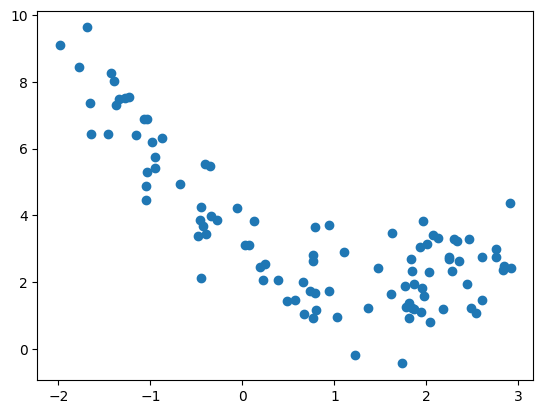

In [11]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

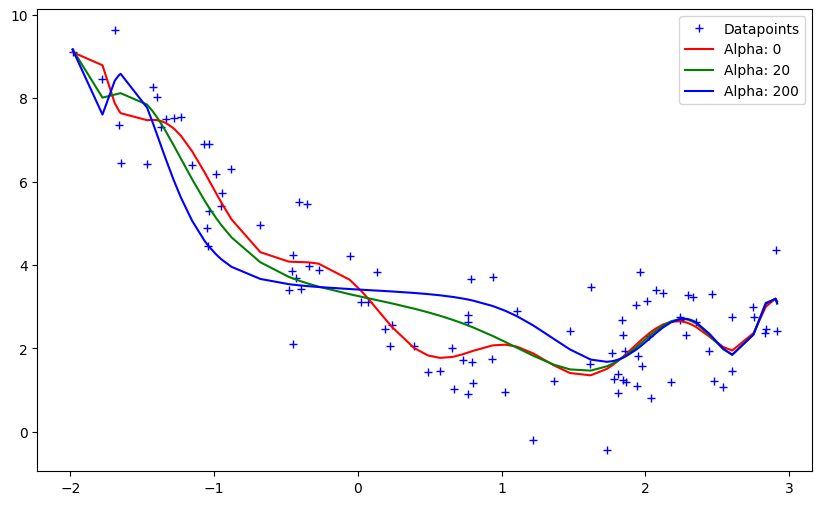

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()